# Modèle de scoring interprétable

## Introduction

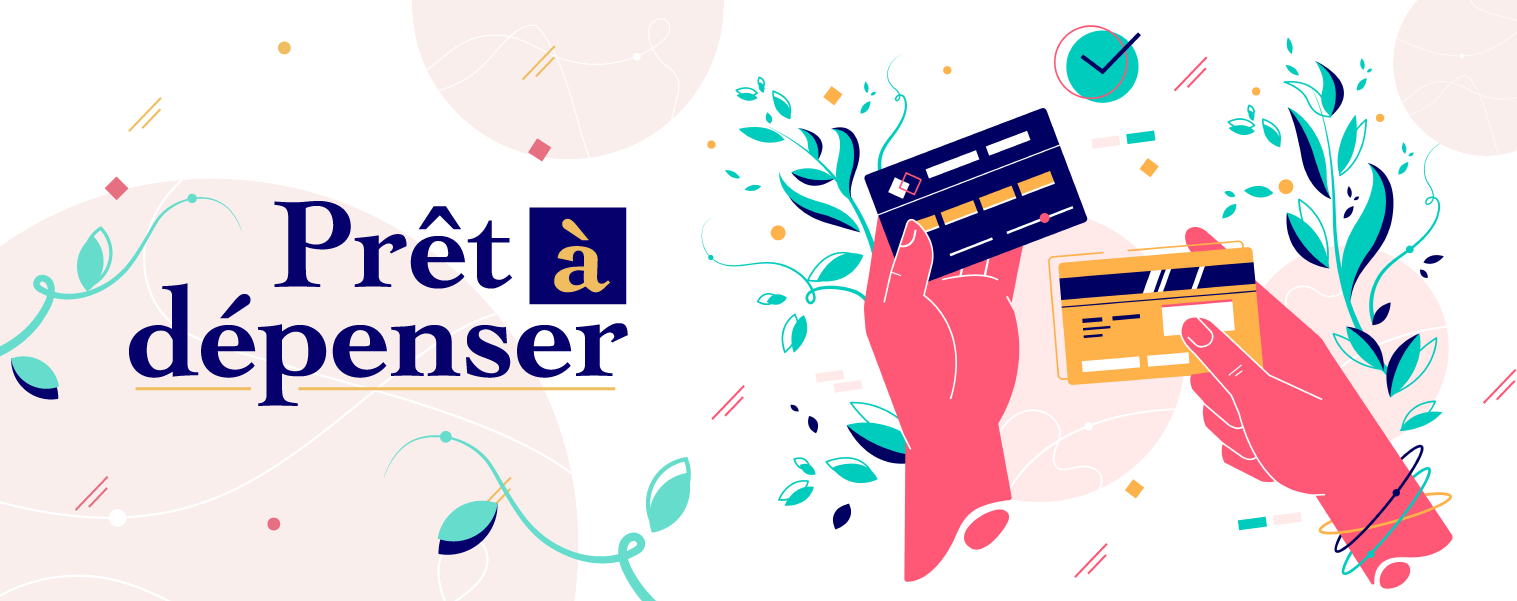


Je vous présente ici les modèles interprétables pour vous aider à prendre une décision sur l'accord/refus d'un crédit à un client.

**Mon rôle:** Data Scientist  
**Nom de la société**: Prêt à dépenser  
**Service de la société**: Propose des crédits à la consommation pour des personnes ayant peu ou pas d'historique de prêt.

**Mission**: Aider à décider si un prêt peut être accordé à un client.  
Mettre en œuvre un algorithme de classification de “scoring crédit” qui calcule la probabilité qu’un client le rembourse ou non.  
Puis classifie la demande : crédit accordé ou refusé.

**Utilisateurs**: Chargés de relation client.

**Remarques**: Le modèle doit être facilement interprétable et doit disposer d’une mesure de l’importance des variables pour définir la probabilité.

---

**Fichiers d'entrée**:
- [10 fichiers CSV](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/Parcours_data_scientist/Projet+-+Impl%C3%A9menter+un+mod%C3%A8le+de+scoring/Projet+Mise+en+prod+-+home-credit-default-risk.zip)
- [Explication de chaque fichier](https://www.kaggle.com/c/home-credit-default-risk/data)
- [Description des colonnes](../input/HomeCredit_columns_description.csv)

## Importation de toutes les fonctions et librairies

En utilisant le code ci-dessous, tout le code et librairies sont importés, permettant un notebook plus clair à utiliser.

In [1]:
from helpers import *

- [Description des fichiers](https://www.kaggle.com/code/willkoehrsen/start-here-a-gentle-introduction/notebook#Data)
- [Description de chaque colonne](./../input/HomeCredit_columns_description.csv)

---

Pour commencer, on se concentre sur **2 fichiers** qui contiennent le plus de données:
- application_test.csv
- application_train.csv

On remarque que le fichier **application_train.csv** est le seul à avoir la colonne TARGET.  
Quand la valeur = 1, le client a eu des difficultés de paiement.  
Quand la valeur = 0, le client n'a pas eu de difficulté.

C'est ce qu'on va chercher à prédire dans nos modèles.

---

**Attention, avant d'utiliser ce notebook**, veuillez vous assurer d'avoir les fichiers:

- [app_train_ready](https://drive.google.com/file/d/1OrfVA1kw3Dqr1Do0ImC02GF30OZbZEf1/view?usp=sharing) (30MB)
- [app_test_ready](https://drive.google.com/file/d/1PJVQQr_XYEmBpUlQC0ZM13Khz3GBUV0o/view?usp=sharing) (30MB)


Ces fichiers ont été générés dans le notebook d'analyse exploratoire.  
Si vous n'avez pas ces fichiers, vous pouvez les télécharger en utilisant les liens cliquables ci-dessus.  
Veuillez bien respecter l'arborescence des fichiers pour les importer correctement.

In [2]:
# Charge les fichiers pour effectuer une modélisation
base_app_train = pd.read_csv('../input/data/application_train.csv')

app_train = pd.read_csv('../input/data/app_train_ready.csv')
app_test = pd.read_csv('../input/data/app_test_ready.csv')

Les données de base contiennent ~10 fois plus de données de client qui ont repayé leur crédit.  
Pour éviter de sur entrainé le modèle sur les bon clients, j'effectue une operation appelé undersampling.  
Qui permet de supprimer les autres données du modèle pour arriver à un modèle qui contient autant de bon et mauvais payeur.  ß

Permettant ainsi un entrainement de modèle égale.  
Voici la différence sur le fichier rebalancé et non balancé.

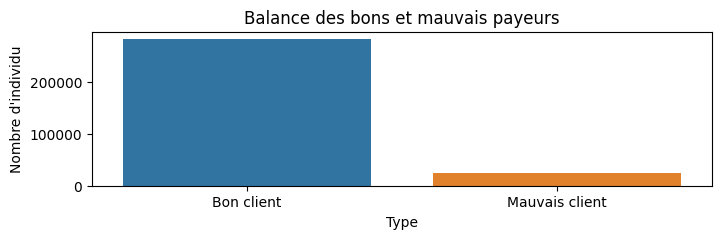

In [3]:
show_feature_balance(base_app_train["TARGET"])

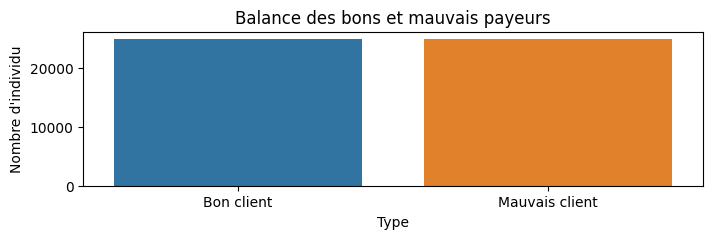

In [4]:
show_feature_balance(app_train["TARGET"])

Pour éviter tous biais éthique, j'ai supprimer les colonnes CODE_GENDER et DAYS_BIRTH de l'analyse.  
Ces données ne seront donc pas utilisés par la suite.

---

J'effectue maintenant une duplication des données sur plusieurs hypothèse pour effectuer les modélisations:

- Somme des colonnes liés à l'habitation
- Somme des colonnes liés à la présence de documentsß
- Somme des colonnes liés à la présence d'information de contact
- Regroupement de ces 3 hypothèse en une

Je rajoute également une copie normalisé pour chacune des hypothèses

In [5]:
all_data = get_all_dataframe(app_train, app_test)
all_data = normalize_all_dataframe(all_data)

for data_name in all_data.keys():
    all_data[data_name] = prepare_dataFrame_for_feature_engineering(all_data[data_name])

Dataframe default shape = (49650, 238)
Dataframe sum_living_features shape = (49650, 196)
Dataframe sum_flag_documents shape = (49650, 219)
Dataframe sum_flag_contacts shape = (49650, 233)
Dataframe sum_flag_living_contact shape = (49650, 172)
Normalizing default dataframes (per columns & all columns)...
Normalizing sum_living_features dataframes (per columns & all columns)...
Normalizing sum_flag_documents dataframes (per columns & all columns)...
Normalizing sum_flag_contacts dataframes (per columns & all columns)...
Normalizing sum_flag_living_contact dataframes (per columns & all columns)...


---

Maintenant que cela est fait, je vais effectuer plusieurs test de modélisation afin d'observer quel est l'hypotèse et le modèle, qui performe le mieux.

Je vais donc lancer les tests sur plusieurs modèles et analyser les résultat pour continuer avec le plus performant

Je commence par entraîner un modèle lineaire de regression logistic

In [6]:
for data_name in all_data.keys():
    log_reg = LogisticRegression(C = 0.0001,solver='lbfgs', max_iter=1000, verbose=0)
    create_baseline(all_data[data_name], "log_reg",log_reg, data_name)

Model log_reg fit: 2.53s, predict: 0.00s, mse: 0.4146
Model log_reg fit: 2.66s, predict: 0.00s, mse: 0.4142
Model log_reg fit: 2.23s, predict: 0.01s, mse: 0.4147
Model log_reg fit: 2.17s, predict: 0.00s, mse: 0.4145
Model log_reg fit: 1.59s, predict: 0.01s, mse: 0.4142
Model log_reg fit: 0.24s, predict: 0.02s, mse: 0.3753
Model log_reg fit: 0.08s, predict: 0.01s, mse: 0.5012
Model log_reg fit: 0.18s, predict: 0.00s, mse: 0.3756
Model log_reg fit: 0.06s, predict: 0.01s, mse: 0.5012
Model log_reg fit: 0.26s, predict: 0.01s, mse: 0.3779
Model log_reg fit: 0.10s, predict: 0.01s, mse: 0.5012
Model log_reg fit: 0.26s, predict: 0.01s, mse: 0.3755
Model log_reg fit: 0.10s, predict: 0.01s, mse: 0.5012
Model log_reg fit: 0.17s, predict: 0.00s, mse: 0.3785
Model log_reg fit: 0.08s, predict: 0.01s, mse: 0.5012


----

Puis j'entraîne un modèle en utilisant un classifier randomForest

In [7]:
# create_baseline(all_model["base"], "rf_classifier",rf_class, "base")
for data_name in all_data.keys():
    rf_class = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose=0, n_jobs=6)
    create_baseline(all_data[data_name], "rf_class",rf_class, data_name)

Model rf_class fit: 2.45s, predict: 0.07s, mse: 0.3296
Model rf_class fit: 1.80s, predict: 0.06s, mse: 0.3190
Model rf_class fit: 2.46s, predict: 0.07s, mse: 0.3283
Model rf_class fit: 2.39s, predict: 0.08s, mse: 0.3275
Model rf_class fit: 1.86s, predict: 0.07s, mse: 0.3192
Model rf_class fit: 2.90s, predict: 0.07s, mse: 0.3297
Model rf_class fit: 0.34s, predict: 0.03s, mse: 0.4429
Model rf_class fit: 1.79s, predict: 0.07s, mse: 0.3190
Model rf_class fit: 0.25s, predict: 0.02s, mse: 0.4399
Model rf_class fit: 2.45s, predict: 0.06s, mse: 0.3278
Model rf_class fit: 0.35s, predict: 0.03s, mse: 0.4337
Model rf_class fit: 2.48s, predict: 0.06s, mse: 0.3275
Model rf_class fit: 0.28s, predict: 0.03s, mse: 0.4422
Model rf_class fit: 1.81s, predict: 0.07s, mse: 0.3184
Model rf_class fit: 0.26s, predict: 0.01s, mse: 0.4370


---

J'entraîne un autre modèle en utilisant XGBoost

In [8]:
for data_name in all_data.keys():
    xgb_class = XGBClassifier(random_state=0)
    create_baseline(all_data[data_name], "xgb_class",xgb_class, data_name)

Model xgb_class fit: 0.73s, predict: 0.02s, mse: 0.3148
Model xgb_class fit: 0.57s, predict: 0.02s, mse: 0.3189
Model xgb_class fit: 0.69s, predict: 0.02s, mse: 0.3196
Model xgb_class fit: 0.71s, predict: 0.02s, mse: 0.3157
Model xgb_class fit: 0.52s, predict: 0.02s, mse: 0.3206
Model xgb_class fit: 0.74s, predict: 0.02s, mse: 0.3148
Model xgb_class fit: 0.70s, predict: 0.02s, mse: 0.3196
Model xgb_class fit: 0.57s, predict: 0.02s, mse: 0.3189
Model xgb_class fit: 0.57s, predict: 0.02s, mse: 0.3213
Model xgb_class fit: 0.71s, predict: 0.02s, mse: 0.3196
Model xgb_class fit: 0.63s, predict: 0.02s, mse: 0.3114
Model xgb_class fit: 0.73s, predict: 0.02s, mse: 0.3157
Model xgb_class fit: 0.71s, predict: 0.02s, mse: 0.3180
Model xgb_class fit: 0.55s, predict: 0.01s, mse: 0.3206
Model xgb_class fit: 0.50s, predict: 0.01s, mse: 0.3166


Et enfin j'entraîne un dernier modèle de réseau de neurones avec Tensorflow.

In [9]:
for data_name in all_data.keys():
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(len(all_data[data_name]["X_train"].columns),))
    ])

    nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    create_baseline(all_data[data_name], "nn_model",nn_model, data_name)

1524/1524 [==============================] - 0s 255us/step
Model nn_model fit: 4.20s, predict: 0.30s, mse: 0.4428
1524/1524 [==============================] - 0s 271us/step
Model nn_model fit: 4.07s, predict: 0.14s, mse: 0.5012
1524/1524 [==============================] - 0s 263us/step
Model nn_model fit: 3.90s, predict: 0.15s, mse: 0.5012
1524/1524 [==============================] - 1s 897us/step
Model nn_model fit: 4.76s, predict: 0.23s, mse: 0.4980
1524/1524 [==============================] - 0s 252us/step
Model nn_model fit: 4.09s, predict: 0.14s, mse: 0.4882
1524/1524 [==============================] - 0s 254us/step
Model nn_model fit: 4.13s, predict: 0.14s, mse: 0.2056
1524/1524 [==============================] - 0s 257us/step
Model nn_model fit: 4.59s, predict: 0.14s, mse: 0.2498
1524/1524 [==============================] - 0s 251us/step
Model nn_model fit: 4.18s, predict: 0.15s, mse: 0.2049
1524/1524 [==============================] - 0s 298us/step
Model nn_model fit: 4.02s, pr

Afin de continuer l'analyse, tous les résultat des modèles ont préalablement été testé sur [Kaggle](https://www.kaggle.com/competitions/home-credit-default-risk).

Si vous n'avez pas le fichier de résultat pour comparer avec des données réels, vous pouvez télécharger les [résultats Kaggle](https://drive.google.com/file/d/1bPF9ZwNYBXixoayC1l5qgD9rTMW1E-vu/view?usp=sharing).

In [10]:
kaggle_results = pd.read_csv("./submissions/result.txt")
(stats, data_2d_local, data_2d_kaggle, local_cols, kaggle_cols) = prepare_stats_results(all_data, kaggle_results)


Nous avons maintenant 45 modèles testés.  
Observons les résultats MSE et AUC de ceci et comparons les aux données réels avant de continuer

/Users/m/dev/6be709c0/oc-ai-engineer/OC/P4/output/helpers.py:386: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


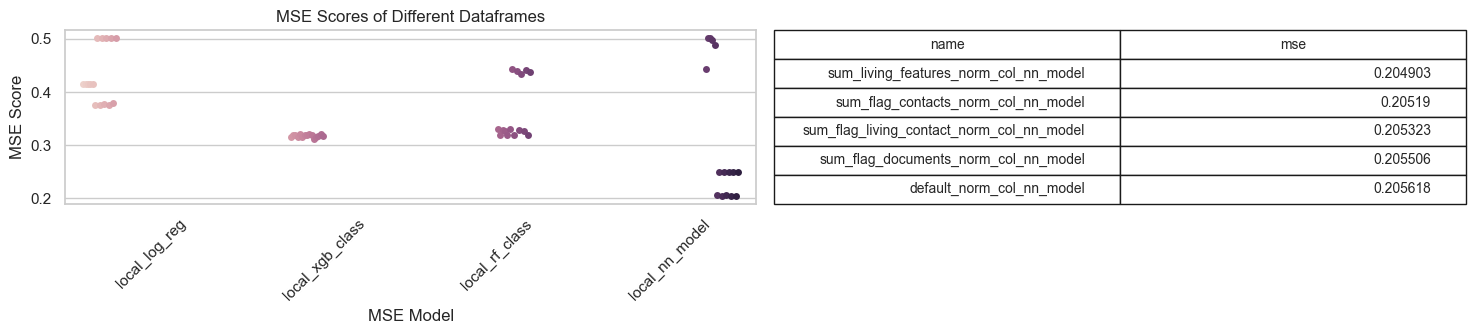

In [11]:
show_graph_local(stats[local_cols], data_2d_local)

On observe alors que le modèle en local qui performe le mieux est le réseau de neurones.  
La meilleur hypotèse ici est sur les données normalisés par colonnes avec la somme des colonnes liés à l'habitation.


---

Maintenant je regarde en utilisant le score AUC:

Meilleur dataframe pour log_reg: default_norm_col avec une AUC de 0.6246
Meilleur dataframe pour rf_class: sum_flag_living_contact_norm_col avec une AUC de 0.6816
Meilleur dataframe pour xgb_class: sum_flag_documents_norm_all avec une AUC de 0.6886
Meilleur dataframe pour nn_model: default_norm_col avec une AUC de 0.7457


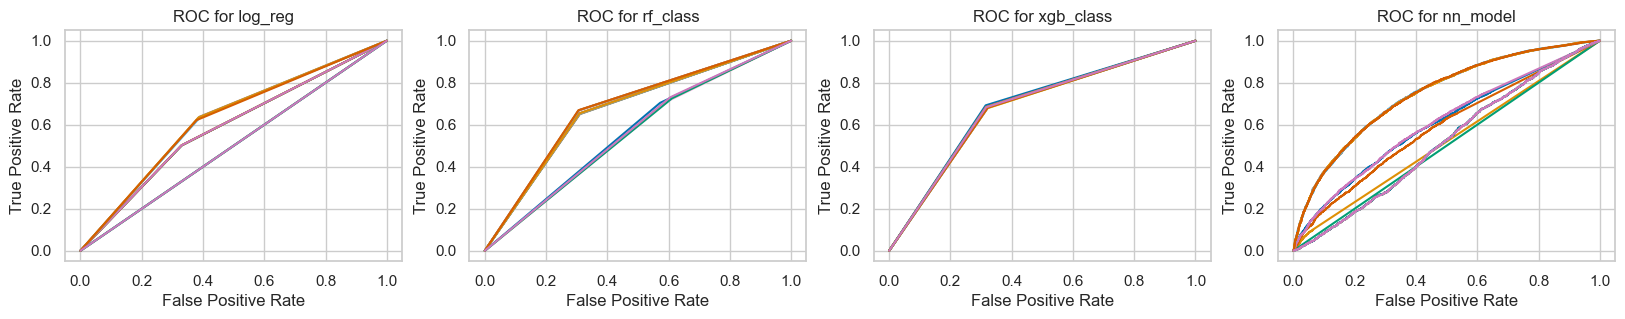

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(20, 3))
for i in enumerate(["log_reg", "rf_class", "xgb_class", "nn_model"]):
   # display_auc(all_data[i]["y_test"],all_data[i]["rf_class_pred"],f"{i} xgb_class")
   best_dataframe, best_roc = display_auc(i[1], axs[i[0]], all_data)
   print(f"Meilleur dataframe pour {i[1]}: {best_dataframe} avec une AUC de {round(best_roc, 4)}")
plt.show()

J'observe alors la même hypothèse sur les même données, avec une AUC de 0.746.

---

Maintenant j'observe les modèles sur des données réels via la soumission de résultat Kaggle.

/Users/m/dev/6be709c0/oc-ai-engineer/OC/P4/output/helpers.py:417: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)


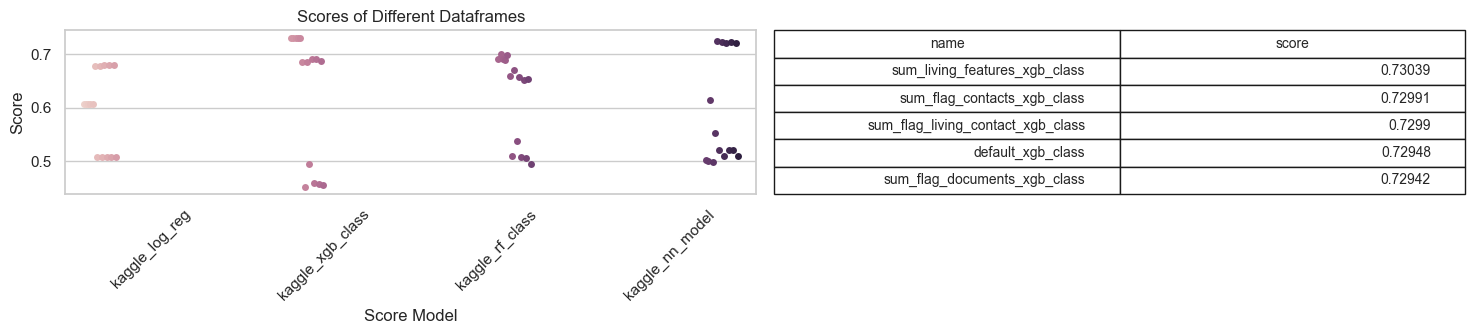

In [13]:
show_graph_kaggle(stats[kaggle_cols], data_2d_kaggle)

C'est un autre modèle qui prend le dessus sur les données réels. Le modèle utilisant XGBoost.  
L'hypotèse conservé est cette fois-ci les données non normalisé avec la somme des colonnes liés à l'habitation.

Ça reste similaire sur l'hypotèse à part qu'on reste sur un dataset non normalisé.

---

Je vais donc me baser sur le modèle et dataset le plus performant pour continuer.
Je vais voir si je peux jouer avec les hyperparamètres afin de trouver celui qui me donne le meilleur score.  

Pour cela, j'utilse GridSearchCV avec un système de score qui prend en compte qu'un mauvais client prédit bon client coûte 10 fois plus qu'un bon client prédit mauvais.

In [14]:
dataFrame = all_data['sum_living_features']
xgb_class = XGBClassifier(random_state=0)

param_grid = {  
    'max_depth': [3, 5, 7],  # Valeurs à tester pour la profondeur maximale de l'arbre de décision  
    'learning_rate': [0.01, 0.1, 0.5],  # Valeurs à tester pour le taux d'apprentissage  
    'n_estimators': [100, 500, 1000]  # Valeurs à tester pour le nombre d'estimateurs dans le modèle  
}  
  
grid_search = GridSearchCV(estimator=xgb_class,scoring=make_scorer(custom_scorer), param_grid=param_grid, cv=3)  
grid_search.fit(dataFrame["X_train"],dataFrame["y_train"])  

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000]},
             scoring=make_scorer(custom_scorer))

In [15]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Les meilleures paramètes sont: {best_params}")

Les meilleures paramètes sont: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}


In [16]:

xgb_class = XGBClassifier(random_state=0, **best_params)
create_baseline(dataFrame, "xgb_class_best",xgb_class, 'sum_living_features')

Model xgb_class_best fit: 1.82s, predict: 0.02s, mse: 0.3088


J'effectue mes observation avec les nouveaux paramètres

In [17]:
xgb_class = XGBClassifier(random_state=0, **best_params)
create_baseline(dataFrame, "xgb_class_best",xgb_class, 'sum_living_features')

Model xgb_class_best fit: 0.00s, predict: 0.00s, mse: 0.3088


In [18]:
false_positive_rate, true_positive_rate, _ = roc_curve(dataFrame["y_test"],dataFrame["xgb_class_best_pred"])  
roc_auc = auc(false_positive_rate, true_positive_rate)

print(f"J'obtiens alors une MSE de: {round(dataFrame['xgb_class_best_mse'],3)} et une AUC de {round(roc_auc,3)}")
print(f"L'ancien score était de MSE {round(dataFrame['xgb_class_mse'],3)} = et AUC = 0.689")

J'obtiens alors une MSE de: 0.309 et une AUC de 0.691
L'ancien score était de MSE 0.319 = et AUC = 0.689


On observe alors une amélioration, et pour les données réels:

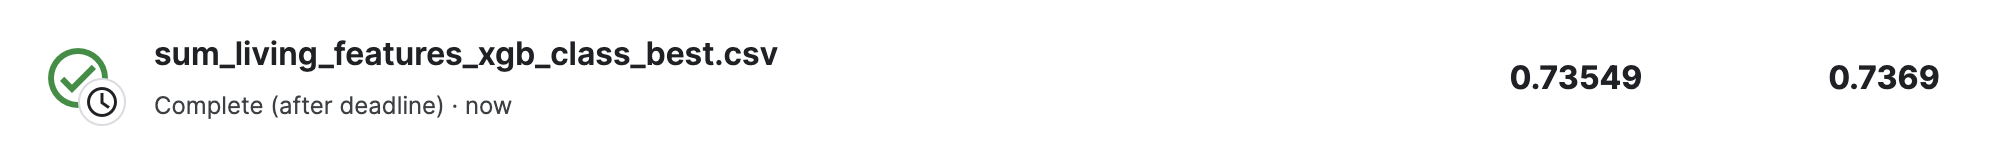

On observe également une amélioration. On passe de 0.73039 à 0.73549.

On a donc une probabilité de définir si le client sera un bon ou mauvais payeur.
Cette probabilité s'arrête sur un seuil de 0.5 par défaut. Ce qui est au dessus de 0.5 seras considéré comme mauvais payeur et ceux en dessous comme bon.

Observons le coût d'un mauvais et bon payeur en gardant ce seuil et voyons plus bas si on peut l'améliorer

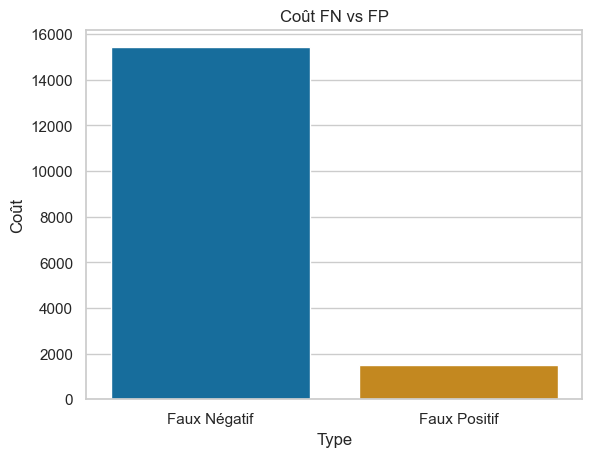

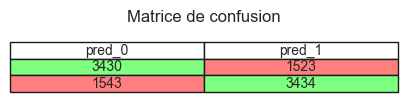

In [19]:
show_cost_difference_fn_fp(0.5, dataFrame)

fig, axs = plt.subplots(1, 1, figsize=(5, 3))
fig.subplots_adjust(top=0.15)
show_confusion_matrix(dataFrame["y_test"],dataFrame["local_test"], axs)

On observe alors que si on accepte trop de clients, on risque de se retrouver avec un coût de faux négatif bien trop elevé.  
On tente alors de trouver le meilleur seuil au lieu de 0.5

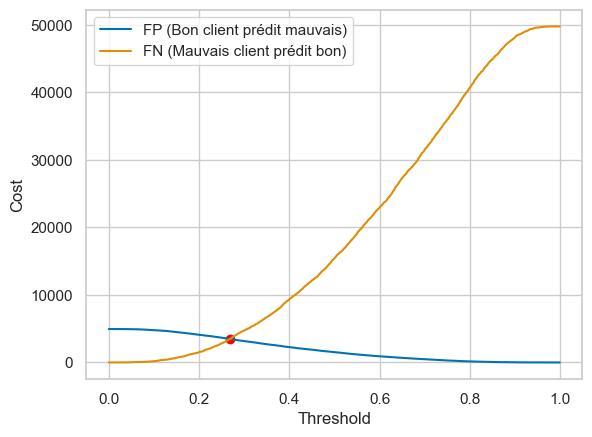

0.269


In [20]:
best_threshold = find_best_threshold(dataFrame)
print(best_threshold)

Et le meilleur seuil trouvé ici est de 0.269.  
Ce qu'il veut dire qu'on aurait tendance à refuser plus de crédits afin de minimiser le coût des mauvais payeur.

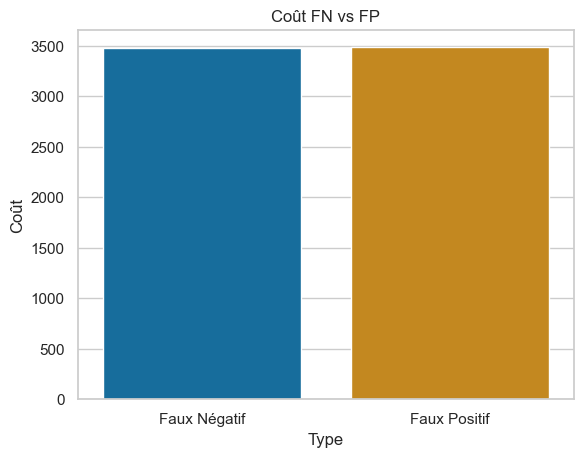

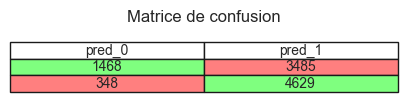

In [21]:
threshold = 0.269 # Modifier cette valeur pour effectuer votre observation
show_cost_difference_fn_fp(threshold, dataFrame)

fig, axs = plt.subplots(1, 1, figsize=(5, 3))
fig.subplots_adjust(top=0.15)
show_confusion_matrix(dataFrame["y_test"],dataFrame["local_test"], axs)

N'hésitez pas à modifier la valeur du seuil (threshold) juste au dessus si vous souhaitez utiliser une différente stratégie.

### Conclusion

Pour conclure, voici l'importance des variables sur l'ensemble des données:

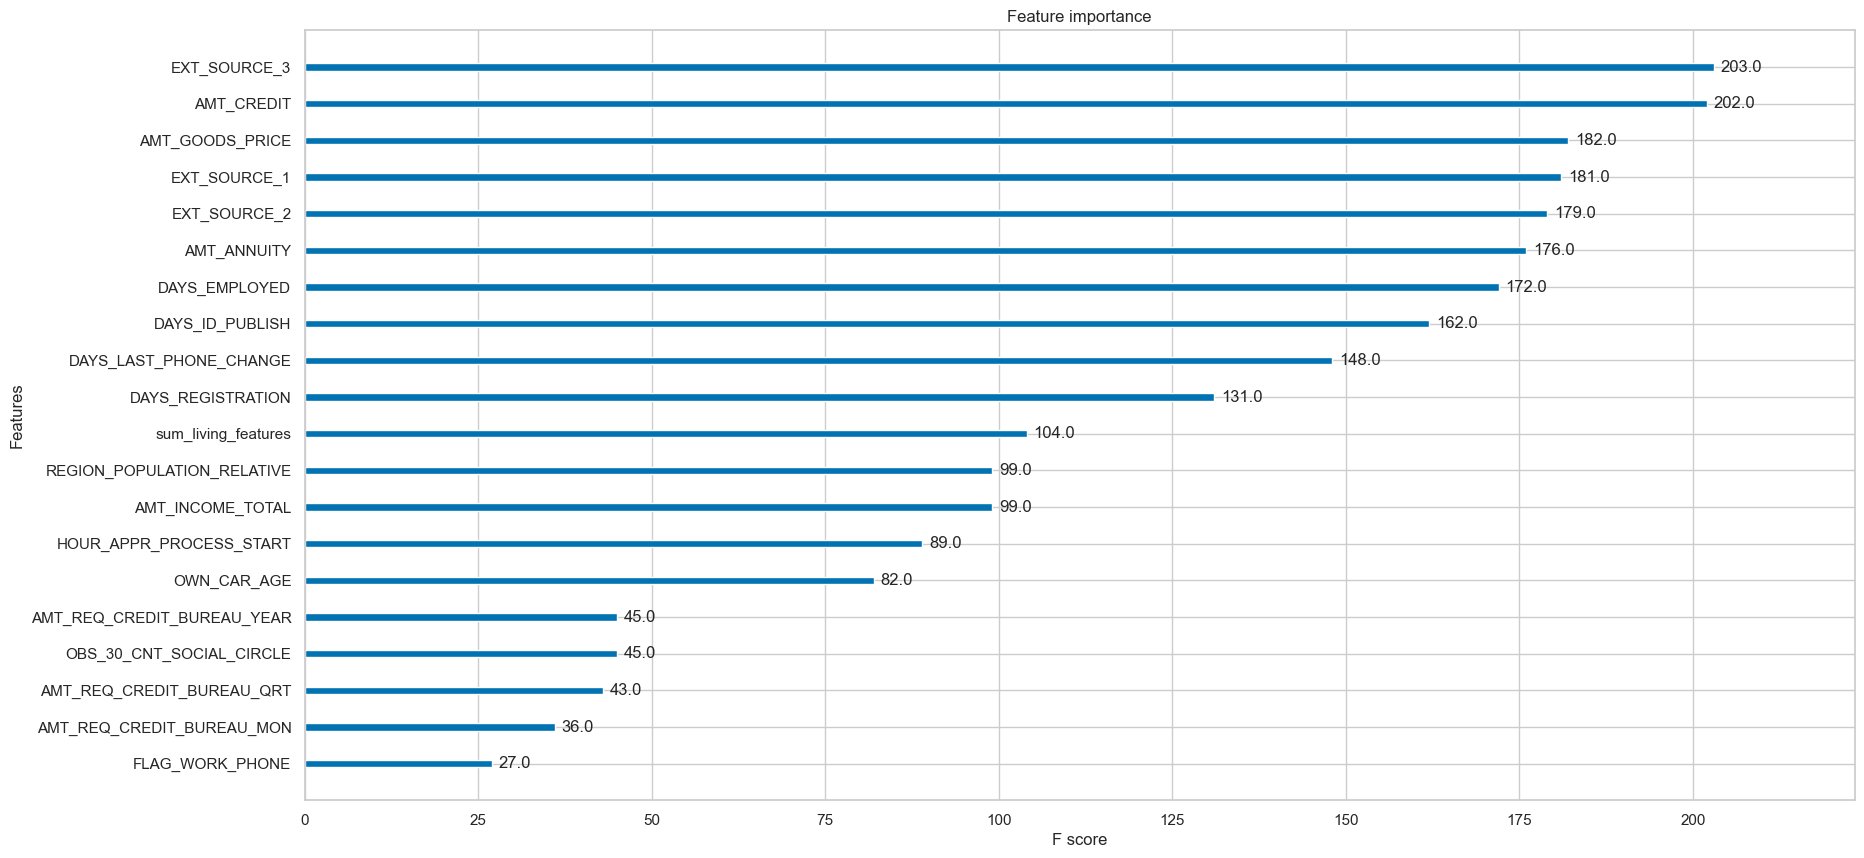

In [22]:
# Plot feature importance
xgb_plot_importance(
    booster=dataFrame["xgb_class_best"],
    max_num_features=20,
)
fig = plt.gcf()
fig.set_size_inches(20, 10)

Et voici l'importance des variables sur deux individus (un bon et un mauvais payeur).  

In [23]:
def check_sample(dataFrame, sample):
    sns.set_style("whitegrid")  

    # Create the exlainer
    explainer = LimeTabularExplainer(
        dataFrame["X_train"].to_numpy(),
        feature_names= dataFrame["X_train"].columns,
    )
    exp = explainer.explain_instance(
        dataFrame["X_test"].iloc[sample],
        dataFrame["xgb_class_best"].predict_proba,
    )
    
    return exp

In [24]:
print(f"Valeur de TARGET = {dataFrame['y_test'].iloc[9]}")
check_sample(dataFrame, 9).show_in_notebook()

Valeur de TARGET = 0


Si vous ne voyez pas l'image générer par le code, la voici:
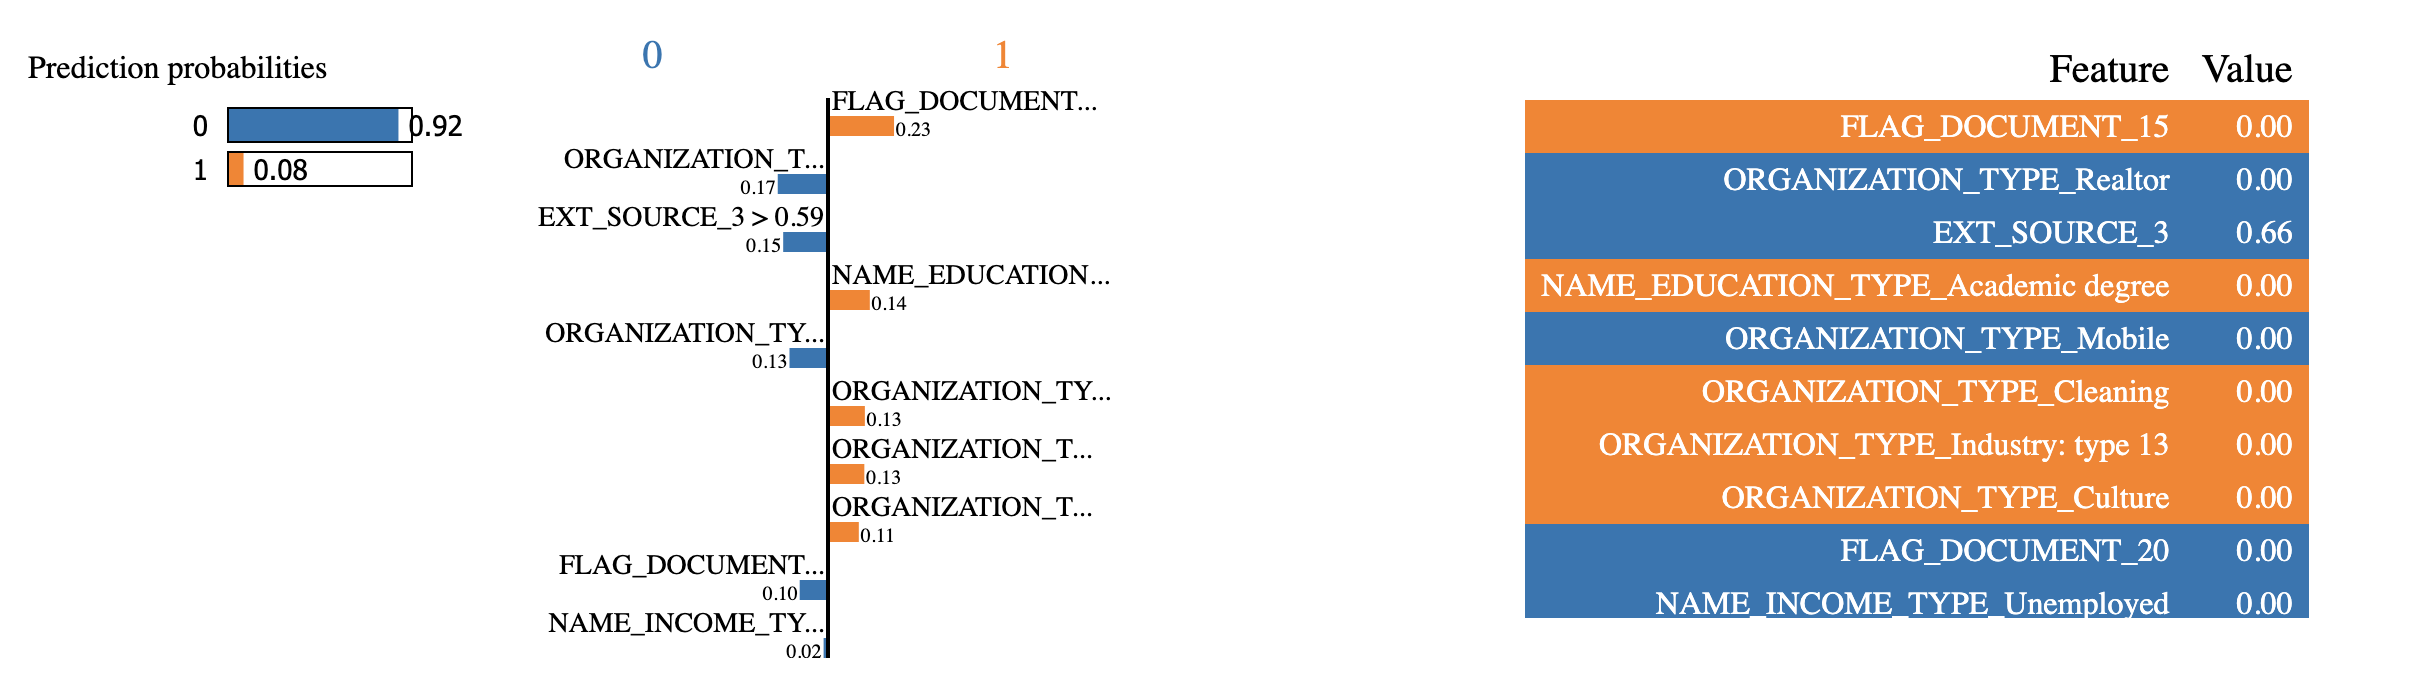

In [25]:
print(f"Valeur de TARGET = {dataFrame['y_test'].iloc[5]}")
check_sample(dataFrame, 5).show_in_notebook()

Valeur de TARGET = 1


Si vous ne voyez pas l'image générer par le code, la voici:
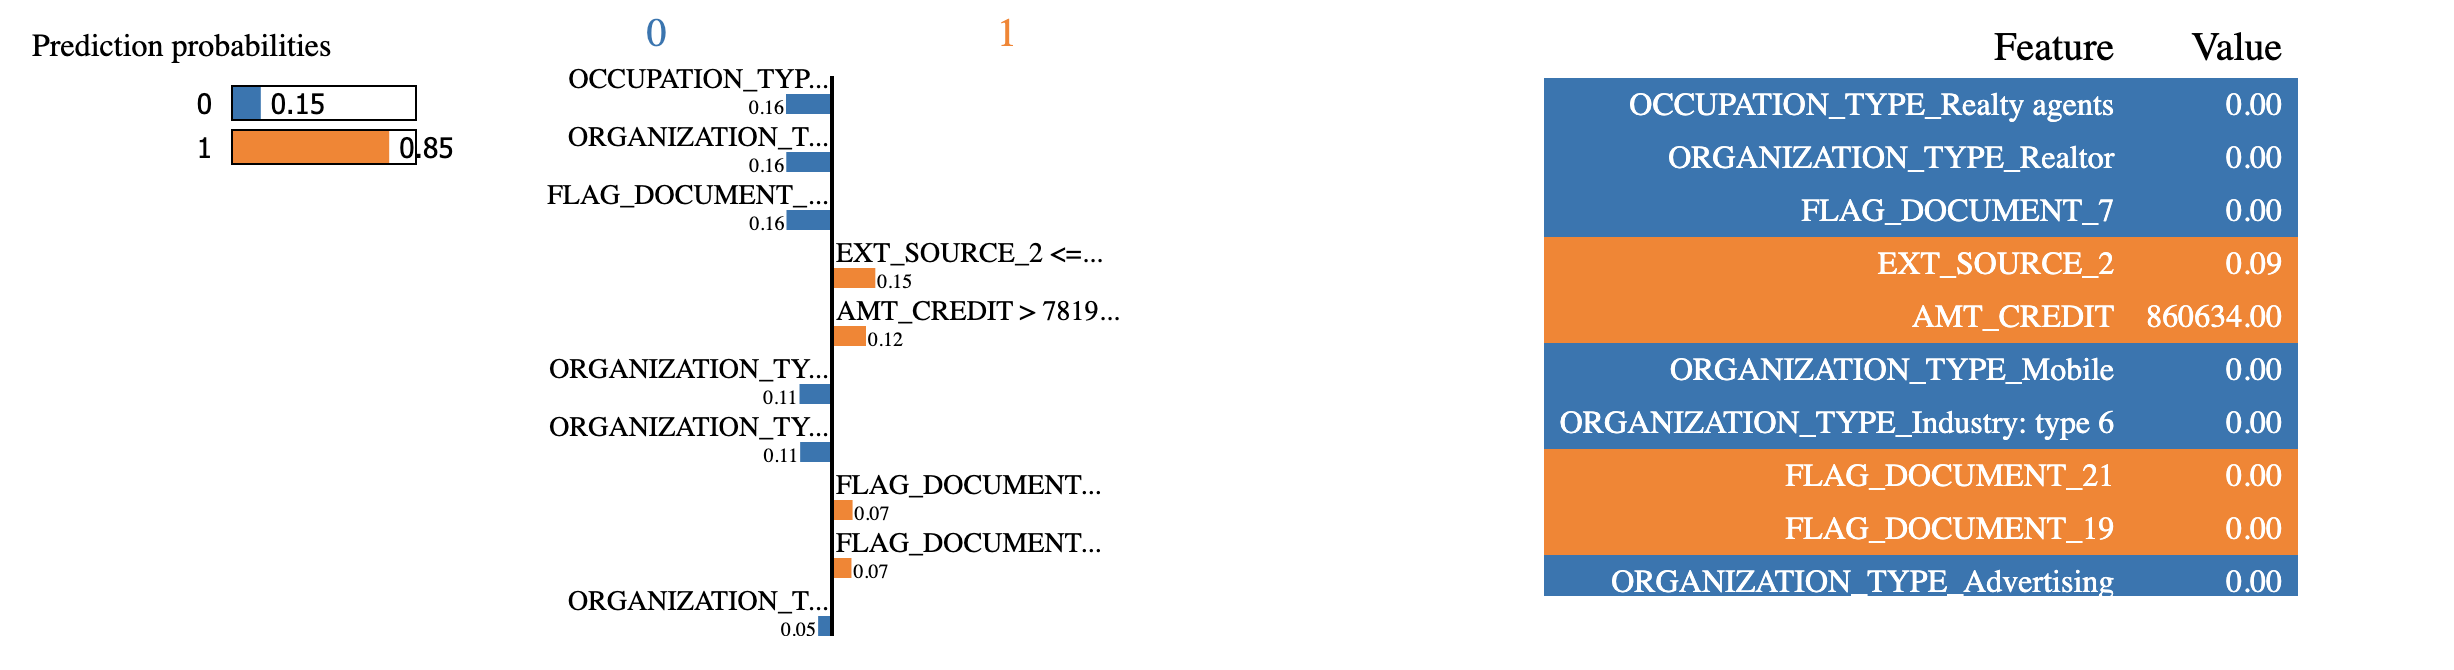

On aura tendance à plus refuser un crédit qu'a en accepter un.
Si toutefois on souhaite modifier la stratégie d'acceptation, ne pas hésiter à modifier le seuil d'acceptance.

Des potentielles améliorations du modèle sont possibles notamment en prenant en compte les différents paramètres